In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from ramannoodles import spectrafit

In [2]:
from ramannoodles import shoyu
import pandas as pd
import math
from ramannoodles import peakidentify

In [3]:
# #If you re-call the method, it will tell you that the files are already downloaded.
# shoyu.initialize_standard_library()
# # open spectra library
# shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# # list keys
# sorted(shoyu_data_dict.keys())

In [4]:
# ---------------------------------------------------------------------------
# FileNotFoundError                         Traceback (most recent call last)
# <ipython-input-13-7b60f1090766> in <module>
#       1 #If you re-call the method, it will tell you that the files are already downloaded.
# ----> 2 shoyu.initialize_standard_library()
#       3 # open spectra library
#       4 shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
#       5 # list keys

# ~\Anaconda3\lib\site-packages\ramannoodles-2.0b0-py3.6.egg\ramannoodles\shoyu.py in initialize_standard_library()
#     116         cas_num = ''.join(cas_lib[item].split('-'))
#     117         download_cas(cas_num)
# --> 118         add_jdx('../raman_spectra/'+cas_num+'_NIST_IR.jdx', label=None)
#     119 
#     120 

# ~\Anaconda3\lib\site-packages\ramannoodles-2.0b0-py3.6.egg\ramannoodles\shoyu.py in add_jdx(filename, label)
#      72         raise TypeError("Passed value of `filename` is not a string! Instead, it is: "
#      73                         + str(type(filename)))
# ---> 74     shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
#      75     data = jcamp.JCAMP_reader(filename)
#      76     y_abs = 1 - data['y']

# FileNotFoundError: [Errno 2] No such file or directory: 'raman_spectra/shoyu_data_dict.p'

In [5]:
# you will need to download the file yourself from the team google drive and edit location
df = pd.read_excel('../development/FormicAcid_3percentconc_400C_5s_00000.xlsx', names=('x', 'y'))

In [6]:
df.head()

,x,y
0,252.5710,-10.500840
1,254.8003,0.000000
2,257.0291,-11.261033
3,259.2572,1.535447
4,261.4848,-1.935974


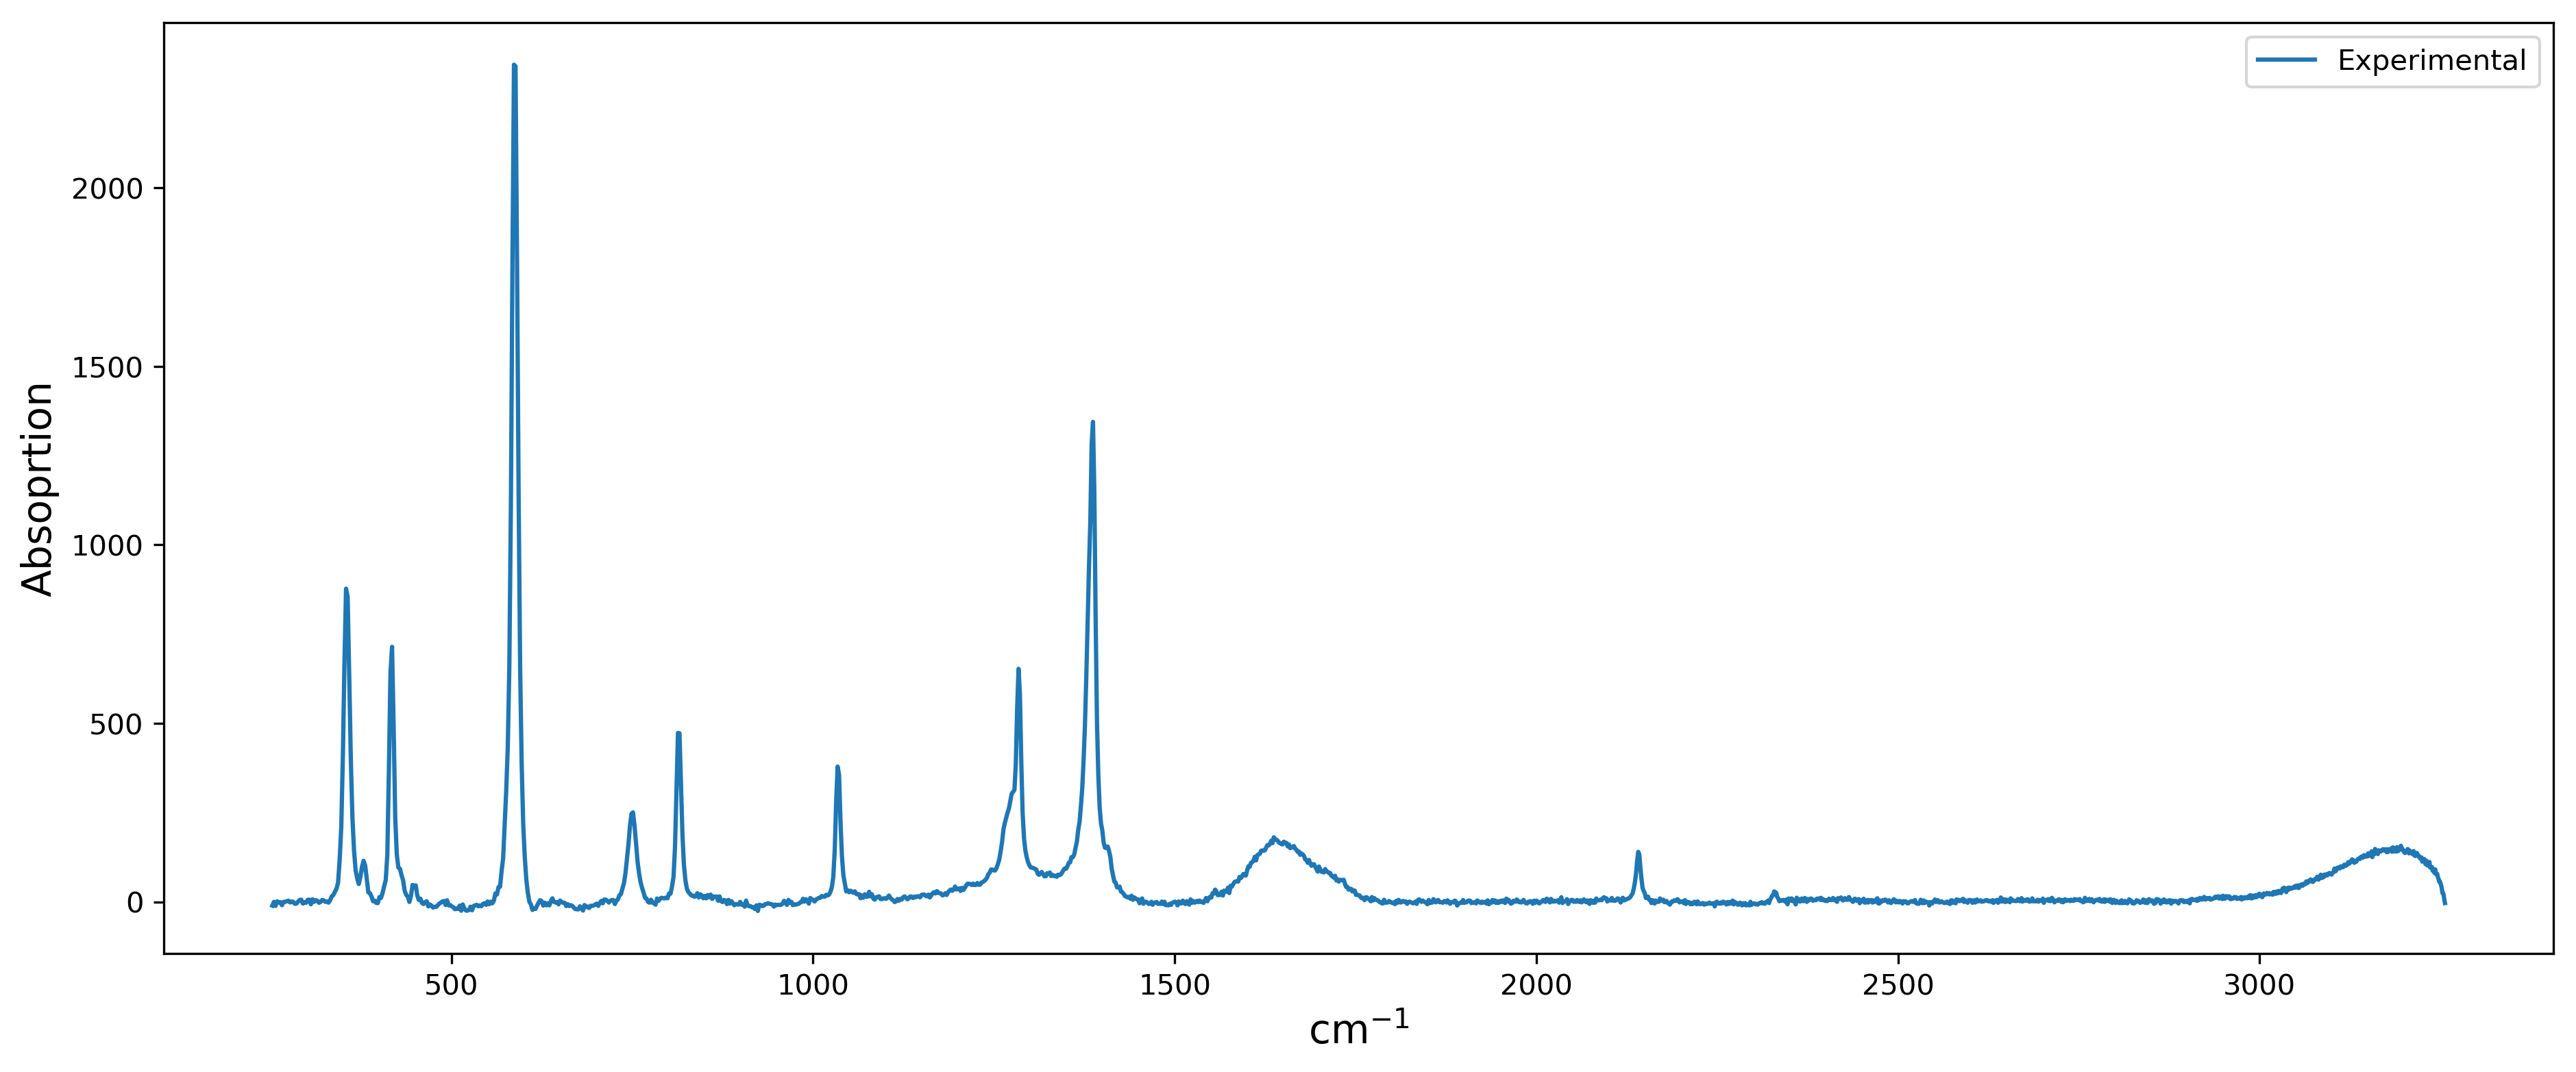

In [7]:
x_data = df['x'].values
y_data = df['y'].values
fig = plt.figure(figsize=(15,6), dpi = 300)
plt.plot(x_data, y_data, label ='Experimental')
plt.xlabel('cm$^{-1}$', fontsize=14)
plt.ylabel('Absoprtion', fontsize=14)
plt.legend()

In [8]:
peaks = spectrafit.find_peaks(x_data, y_data, prominence=0.5)
peaks

(array([], dtype=int64),
 {'peak_heights': array([], dtype=float64),
  'prominences': array([], dtype=float64),
  'left_bases': array([], dtype=int64),
  'right_bases': array([], dtype=int64)})

In [9]:
peaks, peak_list1 = spectrafit.peak_detect(x_data, y_data, height=10, prominence=20)
peaks

[(354.5165, 877.176390406904),
 (378.7089, 114.940949472093),
 (418.138, 714.251100091957),
 (446.4909, 47.3226086034324),
 (586.6575, 2344.58449867747),
 (751.2143, 250.659842290594),
 (813.4106, 473.004788959111),
 (1034.0963, 378.889783389021),
 (1284.2183, 652.628191493507),
 (1387.1289, 1344.26315387477),
 (1637.1264, 180.945603787174),
 (2140.9271, 140.072686446499),
 (2328.892, 29.2055912331114),
 (2432.1446, 13.5784513703811),
 (3195.3272, 157.147798670859)]

In [10]:
from lmfit.models import PseudoVoigtModel

mod, pars = spectrafit.set_params(peaks)
out = spectrafit.model_fit(x_data, y_data, mod, pars)
print(out.fit_report())

[[Model]]
    ((((((((((((((Model(pvoigt, prefix='p1_') + Model(pvoigt, prefix='p2_')) + Model(pvoigt, prefix='p3_')) + Model(pvoigt, prefix='p4_')) + Model(pvoigt, prefix='p5_')) + Model(pvoigt, prefix='p6_')) + Model(pvoigt, prefix='p7_')) + Model(pvoigt, prefix='p8_')) + Model(pvoigt, prefix='p9_')) + Model(pvoigt, prefix='p10_')) + Model(pvoigt, prefix='p11_')) + Model(pvoigt, prefix='p12_')) + Model(pvoigt, prefix='p13_')) + Model(pvoigt, prefix='p14_')) + Model(pvoigt, prefix='p15_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7784
    # data points      = 1940
    # variables        = 45
    chi-square         = 1695810.94
    reduced chi-square = 894.887042
    Akaike info crit   = 13230.0630
    Bayesian info crit = 13480.7330
[[Variables]]
    p1_fraction:    0.41705790 (init = 0.5)
    p1_sigma:       5.25081362 (init = 50)
    p1_center:      354.5165 (fixed)
    p1_amplitude:   11153.9283 (init = 1)
    p1_fwhm:        10.5016272 == '2.000

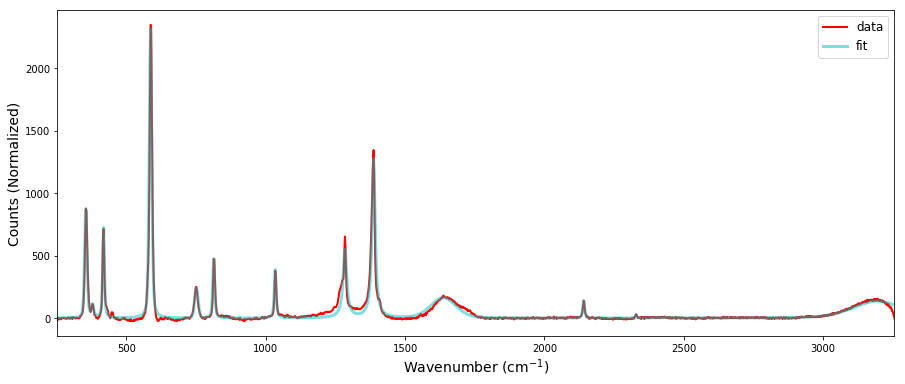

In [11]:
spectrafit.plot_fit(x_data, y_data, out, plot_components=False)

KeyError: 'p16_'

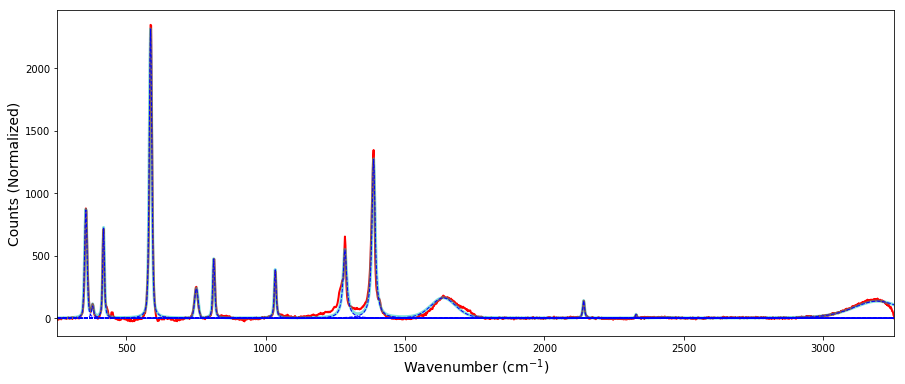

In [27]:
spectrafit.plot_fit(x_data, y_data, out, plot_components=True)

In [13]:
formic_fit = spectrafit.export_fit_data(out)

In [14]:
formic_fit

[array([4.17057904e-01, 5.25081362e+00, 3.54516500e+02, 1.11539283e+04,
        1.05016272e+01, 8.77176390e+02]),
 array([1.00000000e+00, 4.67812789e+00, 3.78708900e+02, 1.43097576e+03,
        9.35625579e+00, 1.14940949e+02]),
 array([6.60198672e-01, 3.78113878e+00, 4.18138000e+02, 7.37115981e+03,
        7.56227756e+00, 7.14251100e+02]),
 array([  1.        , 313.71169013, 446.4909    ,  23.30862131,
        627.42338025,  47.3226086 ]),
 array([4.78634349e-01, 5.47250431e+00, 5.86657500e+02, 3.18446589e+04,
        1.09450086e+01, 2.34458450e+03]),
 array([6.39032292e-02, 7.50925307e+00, 7.51214300e+02, 3.85881382e+03,
        1.50185061e+01, 2.50659842e+02]),
 array([6.57043603e-01, 4.18852217e+00, 8.13410600e+02, 5.35727112e+03,
        8.37704434e+00, 4.73004789e+02]),
 array([8.63816716e-01, 3.82186082e+00, 1.03409630e+03, 4.36372317e+03,
        7.64372164e+00, 3.78889783e+02]),
 array([1.00000000e+00, 8.07736528e+00, 1.28421830e+03, 1.37953193e+04,
        1.61547306e+01, 6.52

In [15]:
f = h5py.File("Formic_test.hdf5", "w")

In [16]:
f['data/x'] = df['x']

In [17]:
f['data/y'] = df['y']

In [18]:
f['compound'] = 'FormicAcid'

In [19]:
list(f.keys())

['compound', 'data']

In [20]:
list(f['data'].keys())

['x', 'y']

In [21]:
for i, _ in enumerate(formic_fit):
    f['peak/{}'.format(i+1)] = formic_fit[i]

In [22]:
list(f['peak/1'])

[0.41705790413476895,
 5.250813623783351,
 354.5165,
 11153.928258071695,
 10.501627247566702,
 877.176390406904]

In [23]:
list(f['peak'])

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [24]:
f['compound']

<HDF5 dataset "compound": shape (), type "|O">

In [25]:
type(f['compound'])

h5py._hl.dataset.Dataset

In [26]:
# List of compounds must be a dictionary 
#list_of_compounds = dict('WATER','CARBON MONOXIDE','CARBON DIOXIDE')
peakidentify.peak_assignment(x_data, y_data, list_of_compounds=dict())

TypeError: peak_assignment() got an unexpected keyword argument 'list_of_compounds'